# Dictionary on DataSet of Titanic.
survival: Survival (0 = no; 1 = yes)
class: Passenger class (1 = first; 2 = second; 3 = third)
name: Name
sex: Sex
age: Age
sibsp: Number of siblings/spouses aboard
parch: Number of parents/children aboard
ticket: Ticket number
fare: Passenger fare
cabin: Cabin
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat: Lifeboat (if survived)
body: Body number (if did not survive and body was recovered)

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

import seaborn as sns
from sklearn import metrics, preprocessing
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline

C:\Python\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Python\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Python\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Python\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Python\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Python\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Python\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run

In [2]:
pwd()

'C:\\Users\\DELL\\Downloads'

In [3]:
titanicData = pd.read_excel('F:\\Shashi\\Reva Assignments\\Predictive Analysis\\titanic.xls', index_col=None, na_values=['NA'])

In [4]:
titanicData.sample(10)
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


# Exploratory Data Analysis

In [5]:
pandas_profiling.ProfileReport(titanicData)

Number of variables,14
Number of observations,1309
Total Missing (%),21.0%
Total size in memory,143.2 KiB
Average record size in memory,112.1 B
Numeric,6
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [6]:
titanicData.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Data Visualization

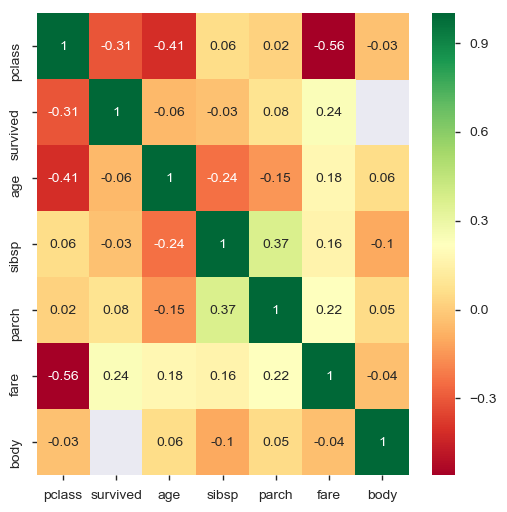

In [7]:
# compute the pair wise correlation for all columns  
correlation_matrix = titanicData.corr().round(2)
plt.subplots(figsize=(6,6))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)#List of columns of titanicData


In [8]:
#List of columns of titanicData
titanicData.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [9]:
titanicData.shape

(1309, 14)

In [10]:
#let’s examine the overall chance of survival for a Titanic passenger.
titanicData['survived'].mean()

0.3819709702062643

In [11]:
#To get a view into the composition of each class, we can group data by class, and view the averages for each column:
titanicData.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [12]:
titanicData.groupby('embarked').mean()

,pclass,survived,age,sibsp,parch,fare,body
embarked,,,,,,,
C,1.851852,0.555556,32.332154,0.400000,0.370370,62.336267,162.000000
Q,2.894309,0.357724,28.630000,0.341463,0.113821,12.409012,175.142857
S,2.347921,0.332604,29.245205,0.550328,0.426696,27.418824,159.348315


In [13]:
titanicData.groupby('sex').mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [14]:
class_sex_grouping = titanicData.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [15]:

titaniCData= titanicData
titanicData.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

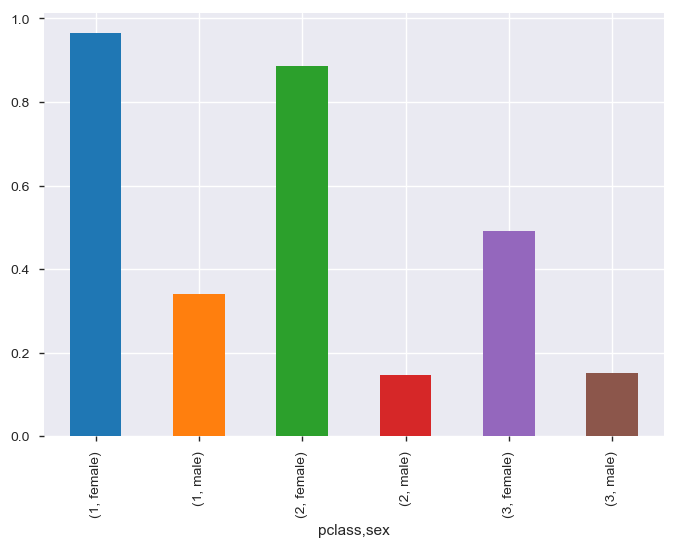

In [16]:
class_sex_grouping['survived'].plot.bar()

In [17]:
titanicData.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [18]:
tdata=titanicData

In [19]:
tdata['age'].min(), tdata['age'].max()

(0.1667, 80.0)

In [20]:
tdata['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [21]:
tdata['survived'].value_counts() *100/len (tdata)

0    61.802903
1    38.197097
Name: survived, dtype: float64

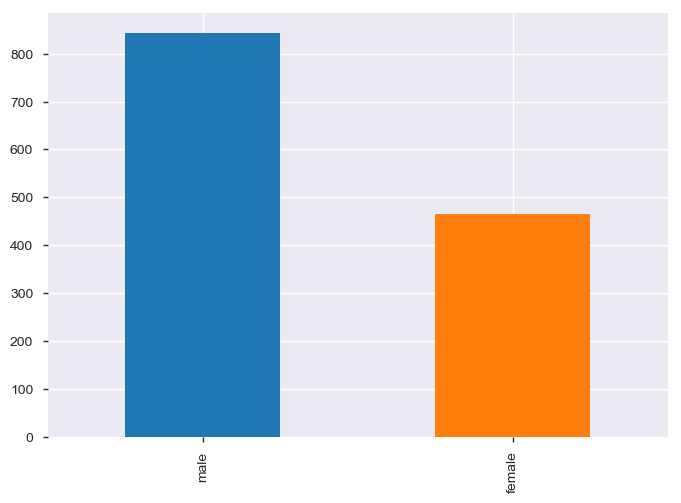

In [22]:
alpha_color = 0.7
tdata['sex'].value_counts() .plot (kind='bar')

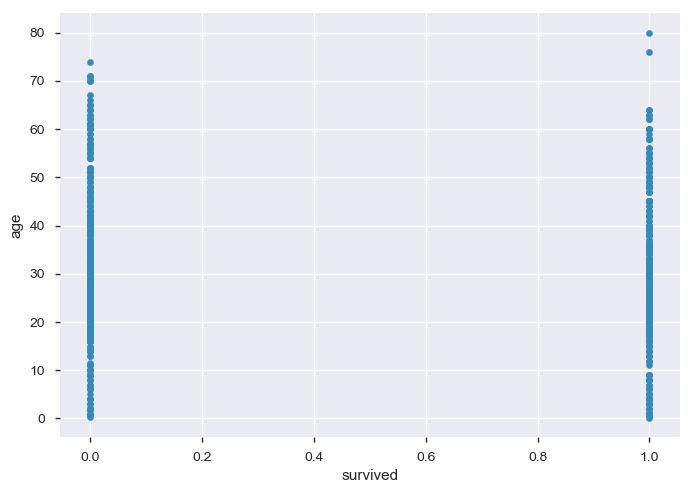

In [23]:
tdata.plot(kind='scatter',x='survived' , y='age' )

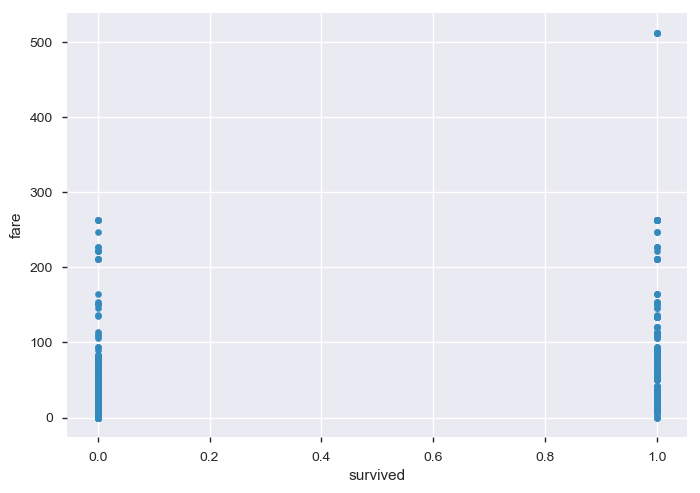

In [24]:
tdata.plot(kind='scatter',x='survived' , y='fare' )

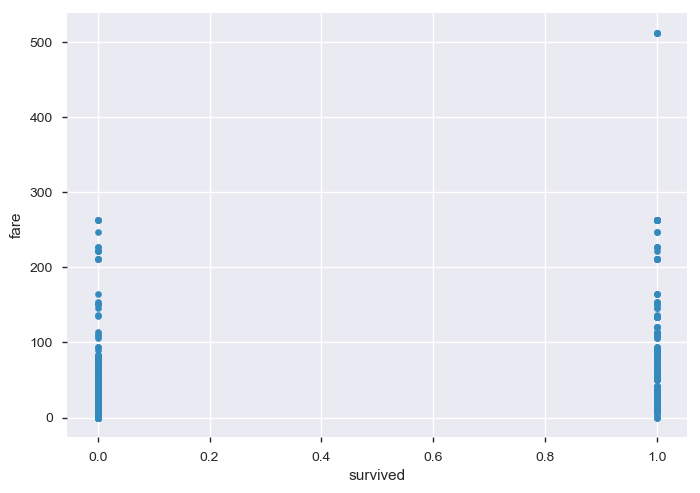

In [26]:
tdata.plot(kind='scatter',x='survived' , y='fare' )

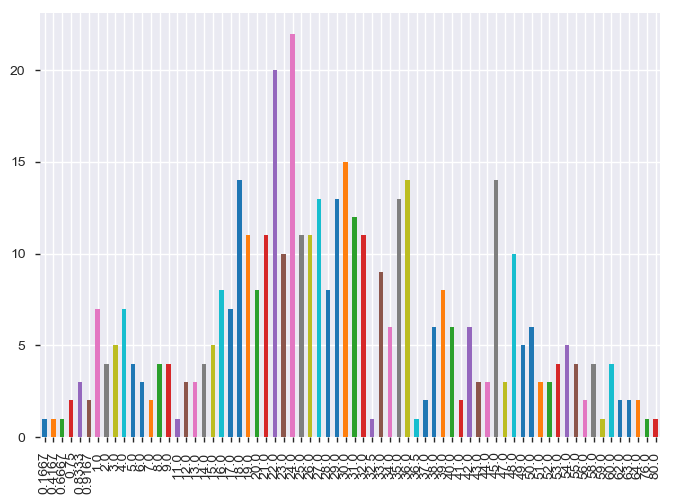

In [27]:
tdata[tdata['survived']==1] ['age'].value_counts().sort_index().plot(kind='bar')

In [28]:
bins =[0,10,20,30,40,50,60,70,80]
tdata['Agebin'] =pd.cut(tdata['age'],bins)

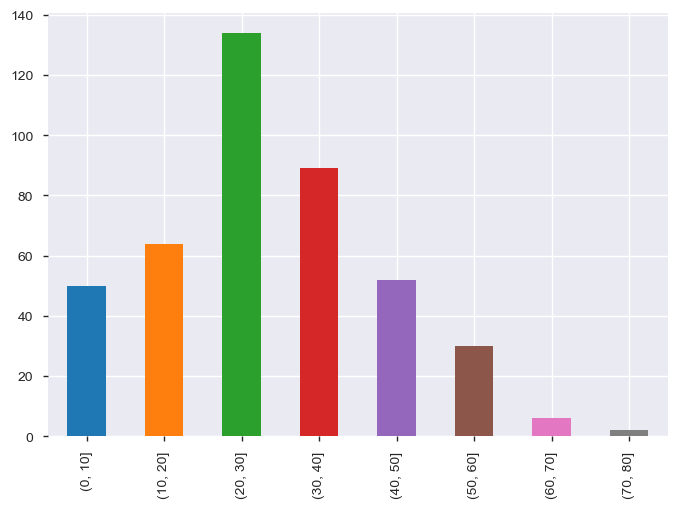

In [29]:
tdata[tdata['survived']==1] ['Agebin'].value_counts().sort_index().plot(kind='bar')

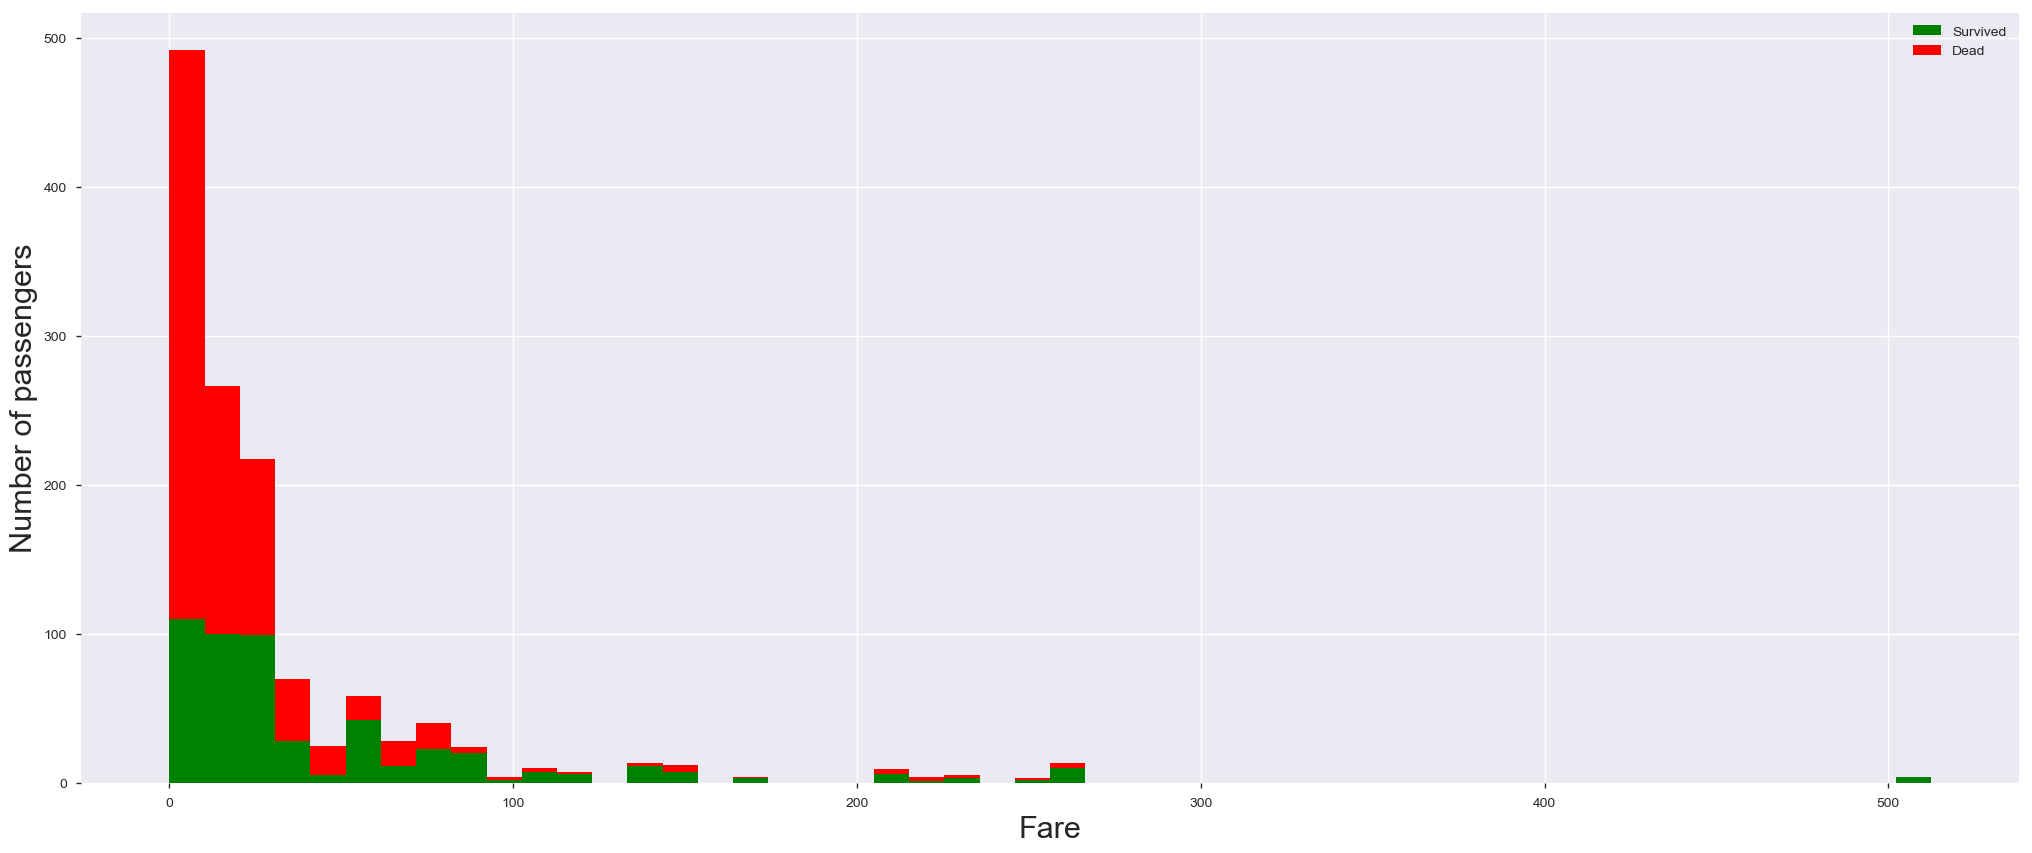

In [30]:
figure = plt.figure(figsize=(25, 10))
plt.hist([tdata[tdata['survived'] == 1]['fare'], tdata[tdata['survived'] == 0]['fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Number of passengers',{'fontname':'Arial', 'size':'22'})
plt.legend();

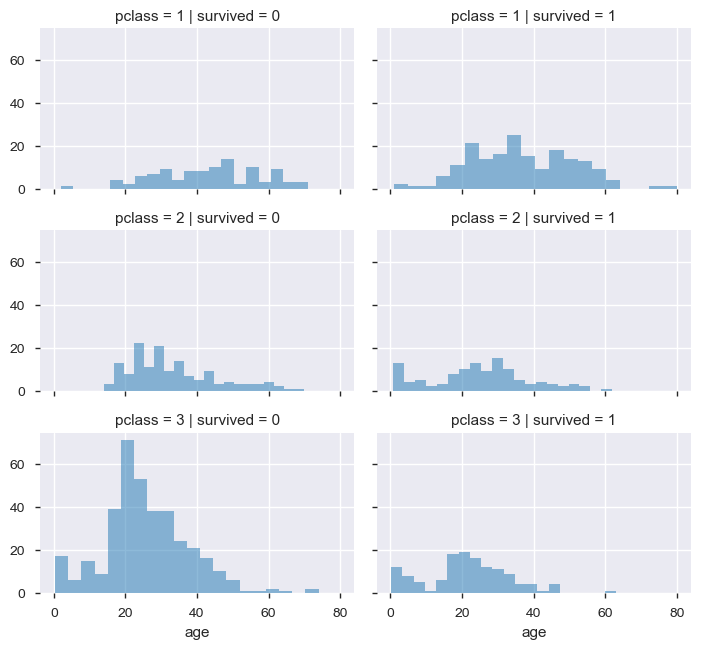

In [32]:
grid = sns.FacetGrid(tdata, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

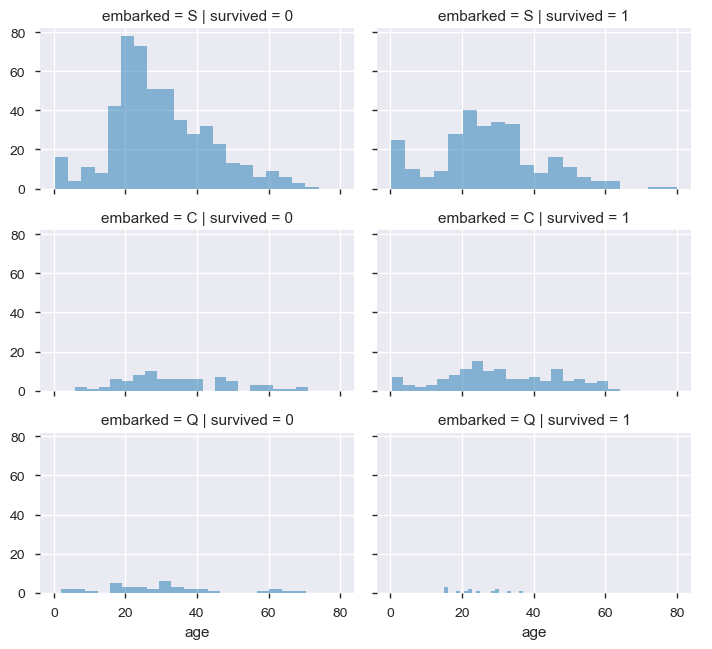

In [33]:
grid = sns.FacetGrid(tdata, col='survived', row='embarked', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

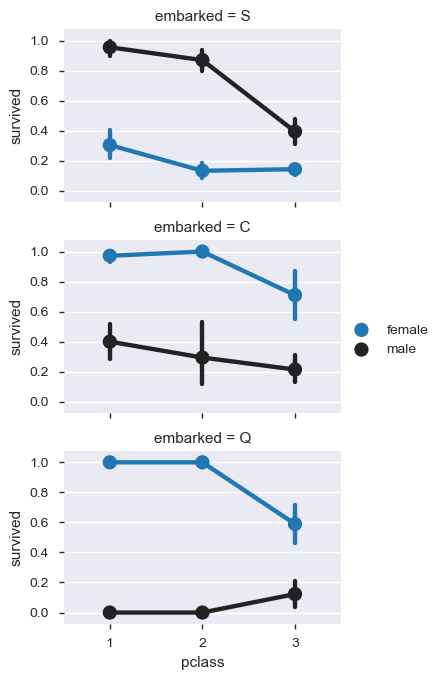

In [34]:
FacetGrid = sns.FacetGrid (tdata , row = 'embarked' , size = 2.3, aspect = 1.6 )
FacetGrid.map(sns.pointplot, 'pclass','survived','sex', palette = None,  order = None, hue_order = None)
FacetGrid.add_legend()

In [35]:
data1 = [tdata]
for dataset in data1:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

tdata['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

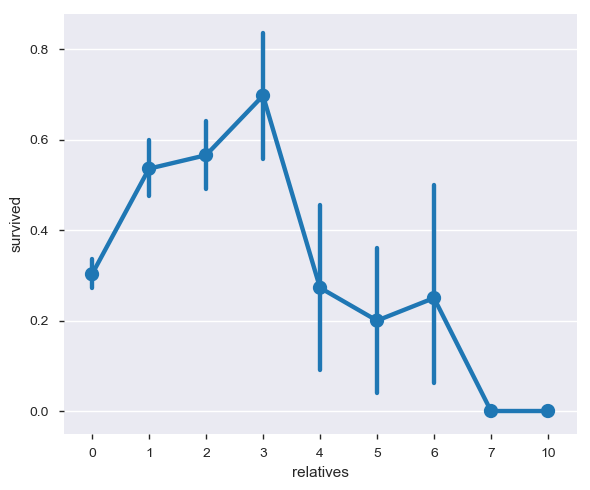

In [36]:
axes = sns.factorplot('relatives','survived', 
                      data=tdata, aspect = 1.2, )

Data Preprocessing

In [37]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [tdata]

for dataset in data:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['Deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

# we can now drop the cabin feature
tdata = tdata.drop(['cabin'], axis=1)

In [40]:
data = [tdata]

for dataset in data:
    mean = tdata["age"].mean()
    # compute random numbers between the mean, std and is_null
   # fill NaN values in Age column with random values generated
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = mean
    dataset["age"] = age_slice
    dataset["age"] = tdata["age"].astype(int)

tdata["age"].isnull().sum()

0

In [41]:
tdata['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [42]:
common_value = 'S'
data = [tdata]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

In [43]:
tdata.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1309 non-null int32
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
embarked     1309 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
Agebin       1046 non-null category
relatives    1309 non-null int64
not_alone    1309 non-null int32
Deck         1309 non-null int32
dtypes: category(1), float64(2), int32(3), int64(5), object(6)
memory usage: 149.8+ KB


In [44]:
data = [tdata]

for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [46]:
data = [tdata]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

tdata = tdata.drop(['name'], axis=1)


In [48]:
gender = {"male": 0, "female": 1}
data = [tdata]

for dataset in data:
    dataset['sex'] = dataset['sex'].map(gender)

In [49]:
tdata['ticket'].describe()

count         1309
unique         939
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [50]:
tdata = tdata.drop(['ticket'], axis=1)

In [51]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [tdata]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [54]:
data = [tdata]
for dataset in data:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[ dataset['age'] > 66, 'age'] = 6

# let's see how it's distributed 
tdata['age'].value_counts()

0    1309
Name: age, dtype: int64

In [55]:
tdata.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,Agebin,relatives,not_alone,Deck,Title
0,1,1,1,0,0,0,211,0,2,NaN,"St Louis, MO","(20, 30]",0,1,2,2
1,1,1,0,0,1,2,151,0,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]",3,0,3,4
2,1,0,1,0,1,2,151,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]",3,0,3,2
3,1,0,0,0,1,2,151,0,NaN,135.0,"Montreal, PQ / Chesterville, ON","(20, 30]",3,0,3,1
4,1,0,1,0,1,2,151,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(20, 30]",3,0,3,3


In [56]:
data = [tdata]

for dataset in data:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare']   = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare']   = 4
    dataset.loc[ dataset['fare'] > 250, 'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

In [57]:
data = [tdata]
for dataset in data:
    dataset['Age_Class']= dataset['age']* dataset['pclass']

In [59]:
#Fare per Person
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

# Let's take a last look at the training set, before we start training the models.
tdata.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,Agebin,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,1,1,1,0,0,0,4,0,2,NaN,"St Louis, MO","(20, 30]",0,1,2,2,0,4
1,1,1,0,0,1,2,4,0,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]",3,0,3,4,0,1
2,1,0,1,0,1,2,4,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]",3,0,3,2,0,1
3,1,0,0,0,1,2,4,0,NaN,135.0,"Montreal, PQ / Chesterville, ON","(20, 30]",3,0,3,1,0,1
4,1,0,1,0,1,2,4,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(20, 30]",3,0,3,3,0,1
5,1,1,0,0,0,0,2,0,3,NaN,"New York, NY","(40, 50]",0,1,5,1,0,2
6,1,1,1,0,1,0,3,0,10,NaN,"Hudson, NY","(60, 70]",1,0,4,2,0,1
7,1,0,0,0,0,0,0,0,NaN,NaN,"Belfast, NI","(30, 40]",0,1,1,1,0,0
8,1,1,1,0,2,0,3,0,D,NaN,"Bayside, Queens, NY","(50, 60]",2,0,3,3,0,1
9,1,0,0,0,0,0,3,1,NaN,22.0,"Montevideo, Uruguay","(70, 80]",0,1,8,1,0,3


In [69]:
dataset.columns
dataset.shape
dataset.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,Agebin,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,1,1,1,0,0,0,4,0,2,NaN,"St Louis, MO","(20, 30]",0,1,2,2,0,4
1,1,1,0,0,1,2,4,0,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]",3,0,3,4,0,1
2,1,0,1,0,1,2,4,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]",3,0,3,2,0,1
3,1,0,0,0,1,2,4,0,NaN,135.0,"Montreal, PQ / Chesterville, ON","(20, 30]",3,0,3,1,0,1
4,1,0,1,0,1,2,4,0,NaN,NaN,"Montreal, PQ / Chesterville, ON","(20, 30]",3,0,3,3,0,1


In [1]:
#Building Machine Learning Models
X = tdata.drop('survived',axis=1)
y = tdata['survived'].values

NameError: name 'dataset' is not defined

In [107]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

pandas.core.frame.DataFrame

In [115]:
import graphviz
from sklearn import tree

ModuleNotFoundError: No module named 'graphviz'

NameError: name 'classes' is not defined